**Objective:**
The objective is to create an accurate housing price prediction model using the XGBoost algorithm. By leveraging the Boston Housing Dataset, we aim to develop a model that can reliably estimate housing prices based on a set of attributes associated with different neighborhoods in Boston.

**Dataset Overview:**
The Boston Housing Dataset, a widely recognized dataset in the field of predictive modeling, comprises a set of essential attributes and corresponding target variable for estimating housing prices in Boston neighborhoods.

The dataset includes the following columns:

- **CRIM (Crime Rate):** The crime rate in the neighborhood.
- **ZN (Zoning Classification):** The proportion of residential land zoned for lots over 25,000 sq. ft.
- **INDUS (Industrial Proportion):** The proportion of non-retail business acres per town.
- **CHAS (Charles River Dummy):** A binary variable indicating whether the property is adjacent to the Charles River.
- **NOX (Nitric Oxides Concentration):** The concentration of nitric oxides in parts per 10 million.
- **RM (Average Number of Rooms):** The average number of rooms per dwelling.
- **AGE (Proportion of Owner-Occupied Units Built Prior to 1940):** The proportion of owner-occupied units built before 1940.
- **DIS (Weighted Distances to Five Boston Employment Centers):** The weighted distances to employment centers in Boston.
- **RAD (Accessibility to Radial Highways):** A measure of accessibility to radial highways.
- **TAX (Property Tax Rate):** The property tax rate.
- **PTRATIO (Pupil-Teacher Ratio):** The pupil-teacher ratio by town.
- **B (Proportion of Black Residents):** The proportion of residents of African American descent.
- **LSTAT (Percentage of Lower Status Population):** The percentage of lower status population in the neighborhood.


The **target variable** is:

**MEDV (Median Value of Owner-Occupied Homes):** The median value of owner-occupied homes, which serves as a critical indicator of housing prices.

**Significance:**
The model's predictions can provide valuable insights for potential buyers, sellers, and real estate professionals. Accurate price estimations enable informed decision-making, while feature analysis sheds light on factors impacting property values. This project showcases the  ability to translate data into actionable insights in the real estate domain.

**Data Loading**

In [1]:
#load the dataset
from sklearn.datasets import fetch_openml

# Load the Boston Housing Dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
import pandas as pd
# Convert the data and target into a pandas DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.Series(boston.target, name='MEDV')

# Concatenate the data and target into a single DataFrame
df= pd.concat([data, target], axis=1)


**Data Exploration**

In [3]:
#Shape of the dataset
print(df.shape)

(506, 14)


In [4]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
227,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307.0,17.4,372.08,6.36,31.6
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19,16.22,14.3
62,0.11027,25.0,5.13,0,0.453,6.456,67.8,7.2255,8,284.0,19.7,396.90,6.73,22.2
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
442,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,8.8
305,0.05479,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222.0,18.4,393.36,8.93,28.4
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265.0,15.6,393.37,5.03,31.1
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666.0,20.2,304.21,19.31,13.0
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97,22.5


In [5]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


In [7]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Preprocessing and EDA**

In [8]:
#Check for missing values
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Outlier detection

# Define the list of numerical features
num_feat = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Convert the selected columns to a numerical data type
df[num_feat] = df[num_feat].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after converting to numeric
df.dropna(subset=num_feat, inplace=True)

# Calculate the IQR for each column
Q1 = df[num_feat].quantile(0.25)
Q3 = df[num_feat].quantile(0.75)
IQR = Q3 - Q1

# Define the thresholds for identifying outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count the number of outliers in each column
outliers_count = ((df[num_feat] < lower_threshold) | (df[num_feat] > upper_threshold)).sum()

# Display the count of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")



Number of outliers in CRIM: 66
Number of outliers in ZN: 68
Number of outliers in INDUS: 0
Number of outliers in CHAS: 35
Number of outliers in NOX: 0
Number of outliers in RM: 30
Number of outliers in AGE: 0
Number of outliers in DIS: 5
Number of outliers in RAD: 0
Number of outliers in TAX: 0
Number of outliers in PTRATIO: 15
Number of outliers in B: 77
Number of outliers in LSTAT: 7


Hence we find that most of the columns contain outliers.

Univariate Analysis:

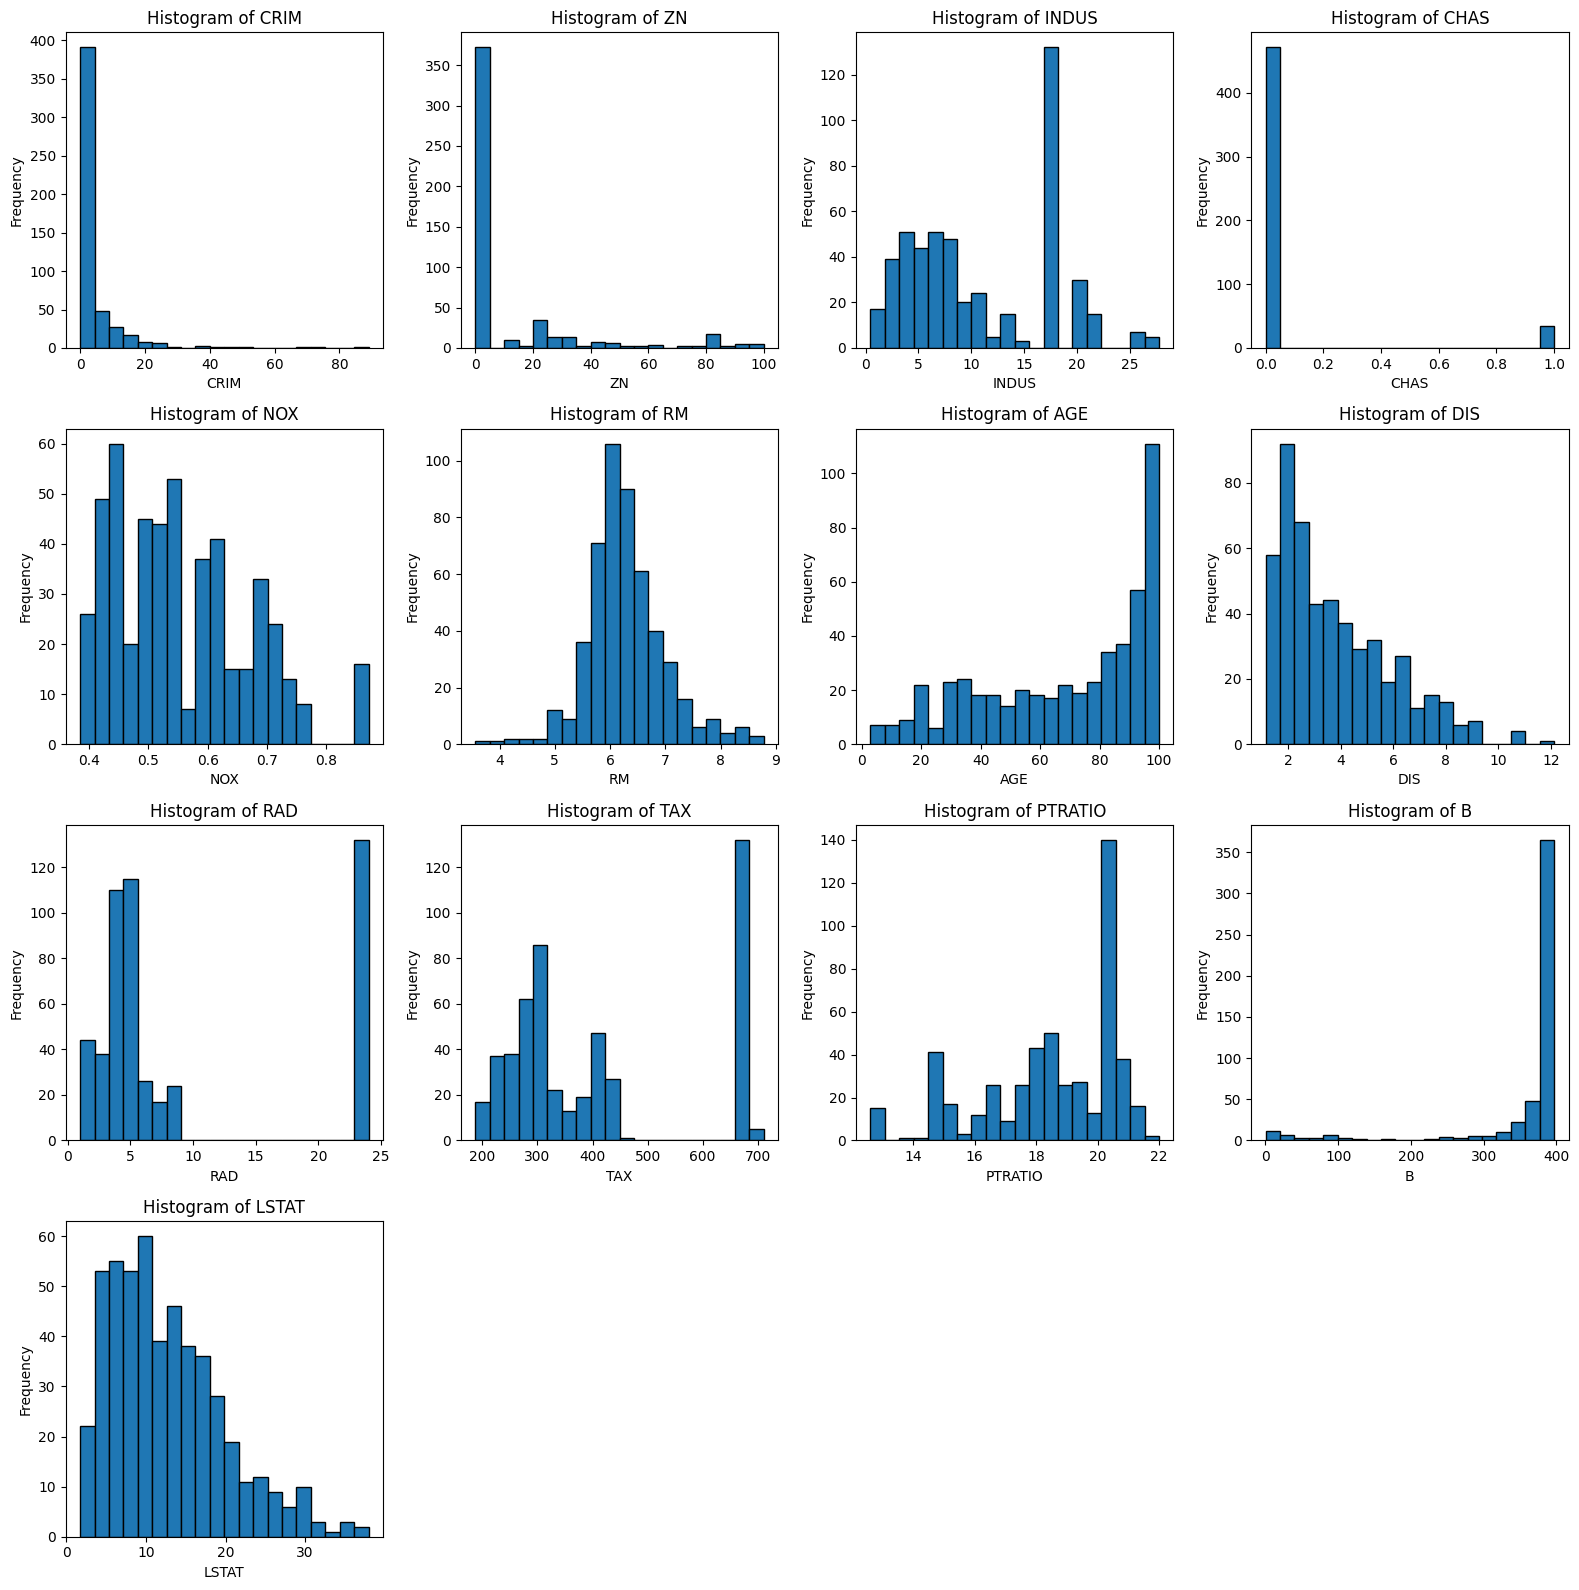

In [10]:
import matplotlib.pyplot as plt

# Select numerical features for which you want to plot histograms
num_feat = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Set up subplots
num_features = len(num_feat)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows * 4))
fig.subplots_adjust(hspace=0.5)

# Iterate through numerical features and plot histograms
for i, feature in enumerate(num_feat):
    ax = axes[i // num_cols, i % num_cols]
    df[feature].plot(kind='hist', ax=ax, bins=20, edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for i in range(num_features, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

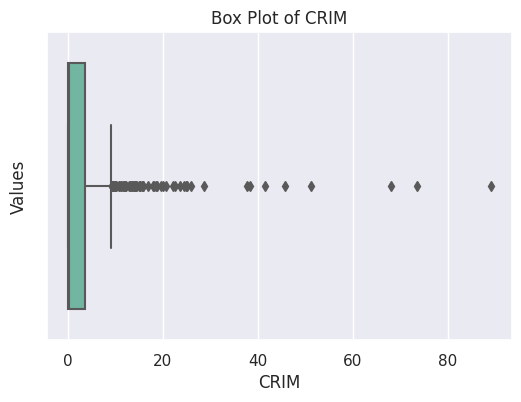

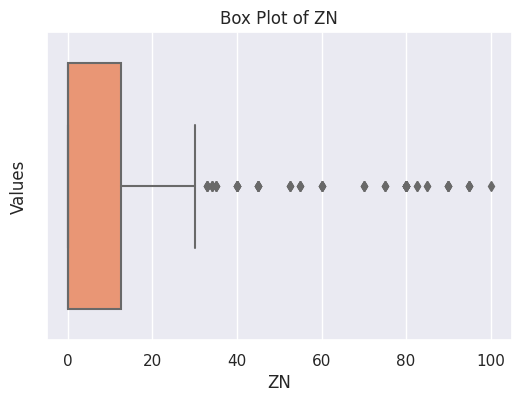

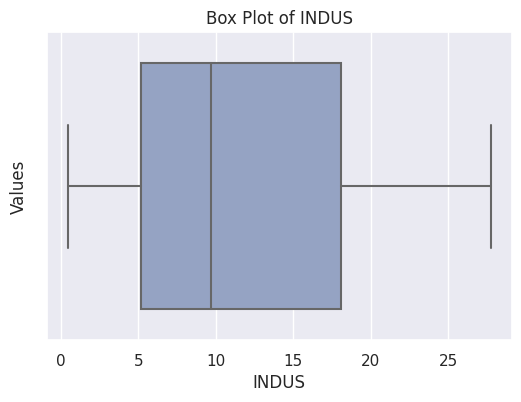

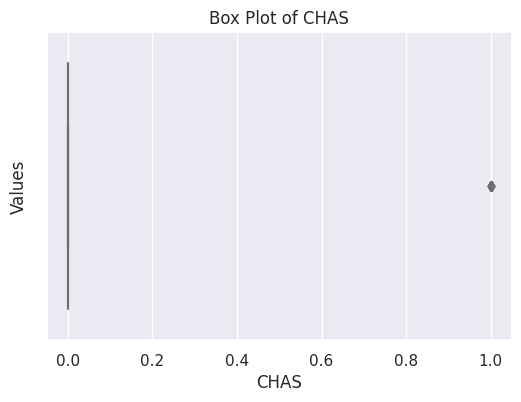

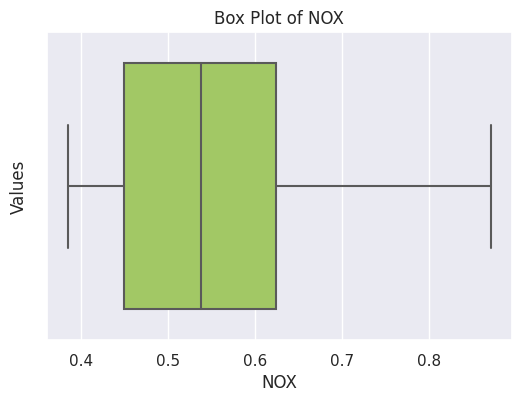

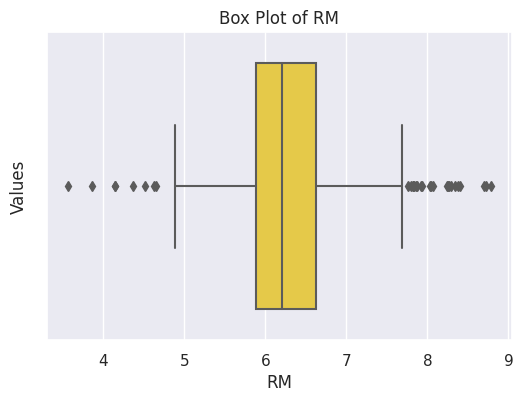

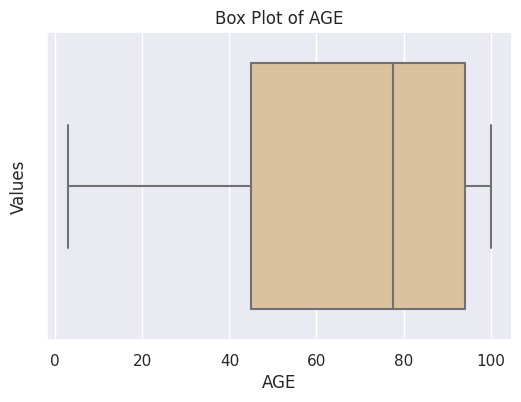

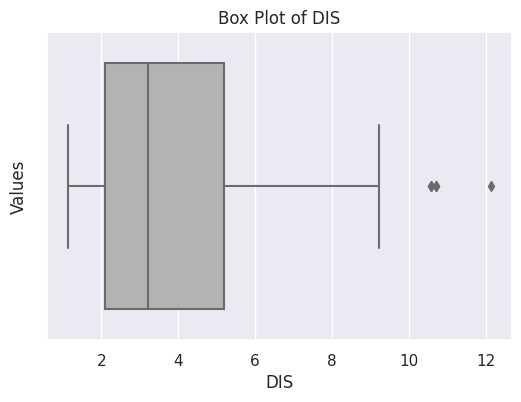

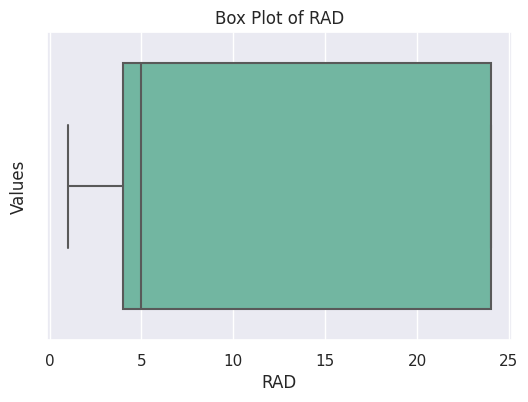

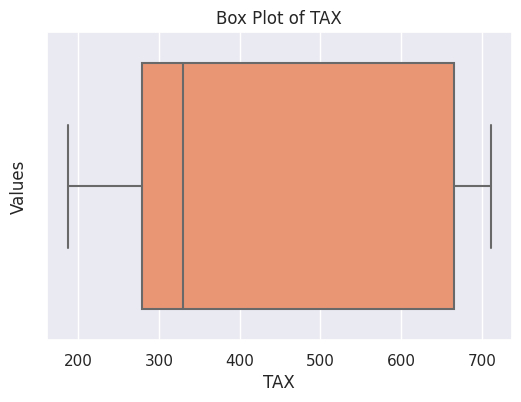

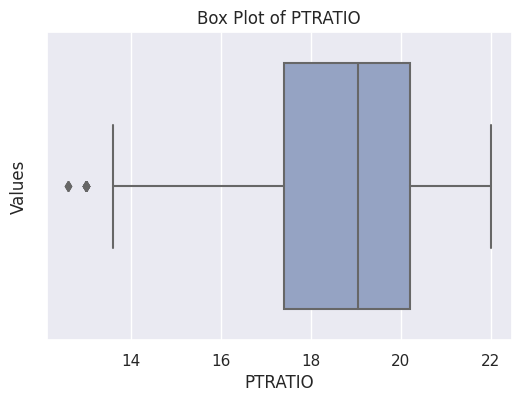

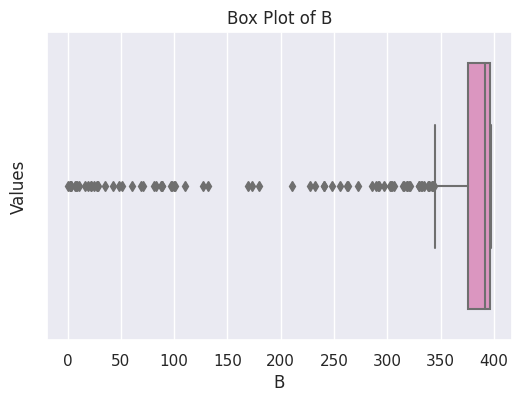

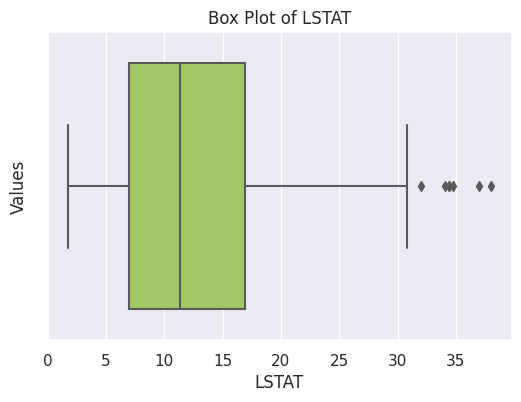

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# List of numerical features
numerical_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Define a color palette for the box plots
color_palette = sns.color_palette("Set2", len(numerical_features))

# Create individual box plots for each numerical feature
plt.figure(figsize=(12, 8))
for idx, feature in enumerate(numerical_features):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, data=df, palette=[color_palette[idx]])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()




Observations:


*   The columns CRIM,ZN,B contain a lot of outliers.
*   We can see that the values in the column CHAS are almost 0. Hence we will be dropping it.



In [12]:
df.drop(['CHAS'],axis=1,inplace=True)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [13]:
#Outliers removal using Winsorization

from scipy.stats.mstats import winsorize
import numpy as np

# Function to treat outliers
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1], inclusive=(True, True))

    return dataframe

# Apply the function to your DataFrame
df = treat_outliers(df)

# Display the updated statistics after Winsorization
print("Descriptive Statistics after Winsorization:")
df.describe()







Descriptive Statistics after Winsorization:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.422883,8.522727,10.934387,0.548480,6.255480,68.795652,3.662303,9.588933,408.897233,18.492095,359.427372,12.220138,21.819368
std,3.738429,15.441906,6.416626,0.101417,0.523654,27.379172,1.794047,8.670480,166.460239,2.017237,81.478208,6.066184,7.060535
min,0.027630,0.000000,2.180000,0.409000,5.304000,17.700000,1.460800,2.000000,222.000000,14.700000,83.450000,3.700000,10.200000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,10.834200,45.000000,19.580000,0.713000,7.155000,98.800000,6.818500,24.000000,666.000000,20.900000,396.900000,23.090000,34.900000


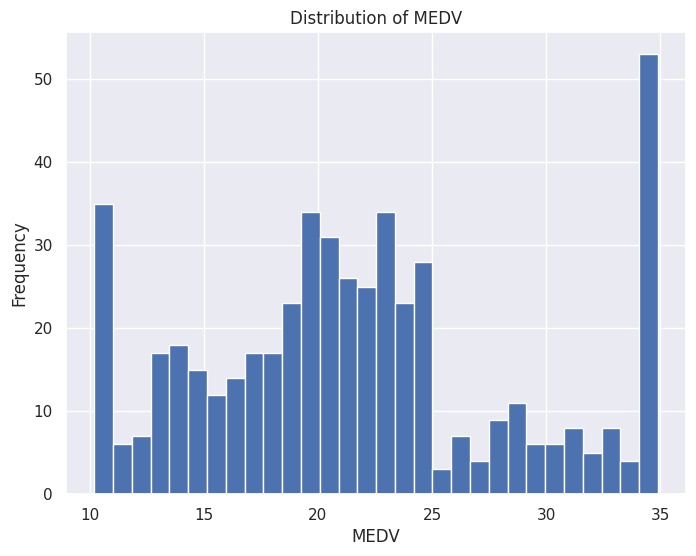

In [14]:
#Histogram of Target variable
plt.figure(figsize=(8, 6))
plt.hist(df['MEDV'], bins=30)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

Multivariate Analysis:

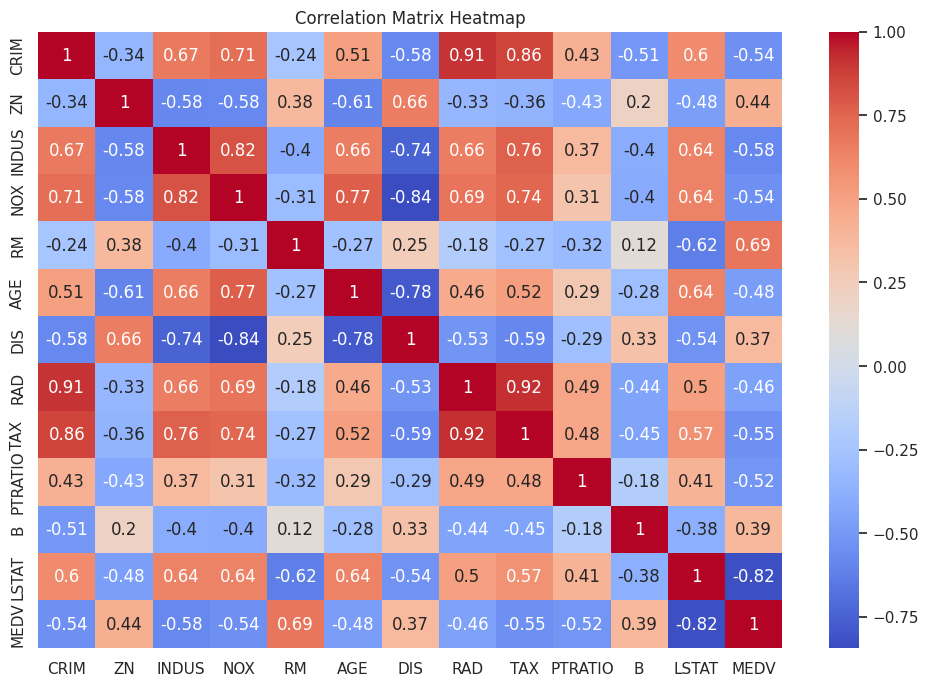

In [15]:
#Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

correlation_matrix=df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

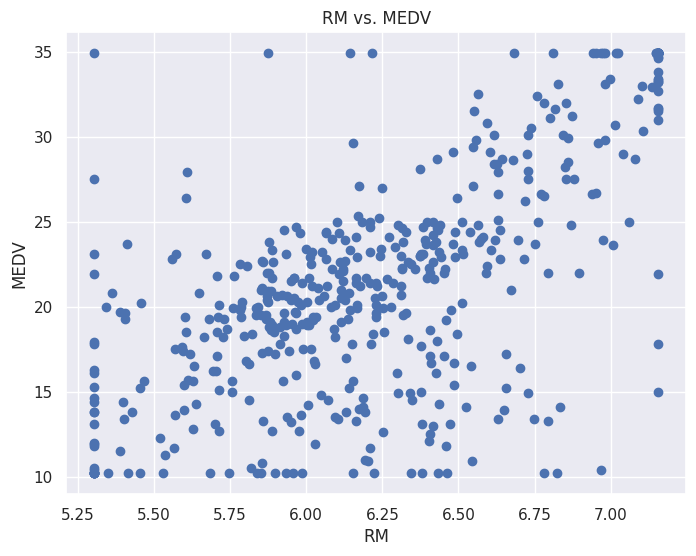

In [16]:

# Scatter plot of RM vs. MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM vs. MEDV')
plt.show()

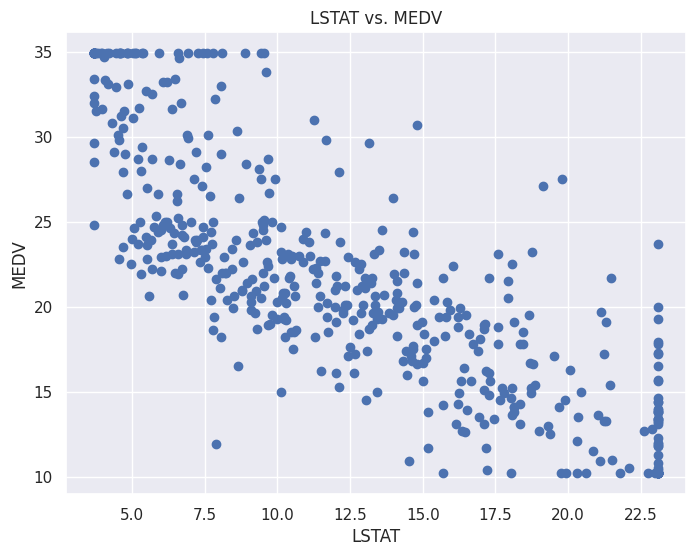

In [17]:
# Scatter plot of LSTAT vs. MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT vs. MEDV')
plt.show()

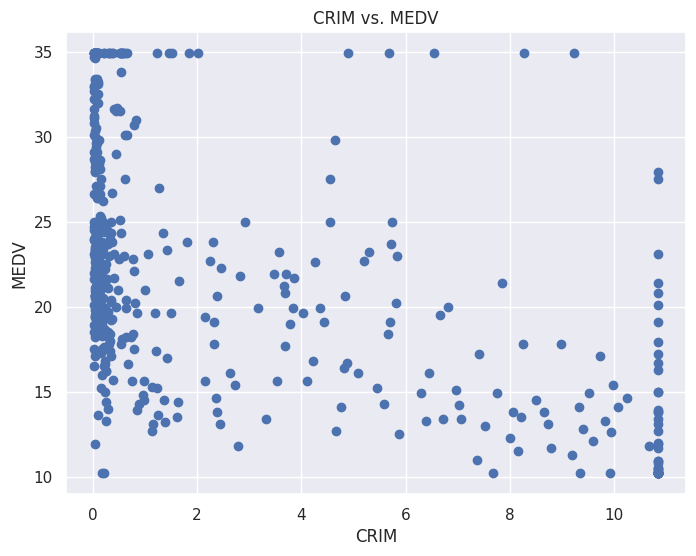

In [18]:
# Scatter plot of CRIM vs. MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['CRIM'], df['MEDV'])
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('CRIM vs. MEDV')
plt.show()

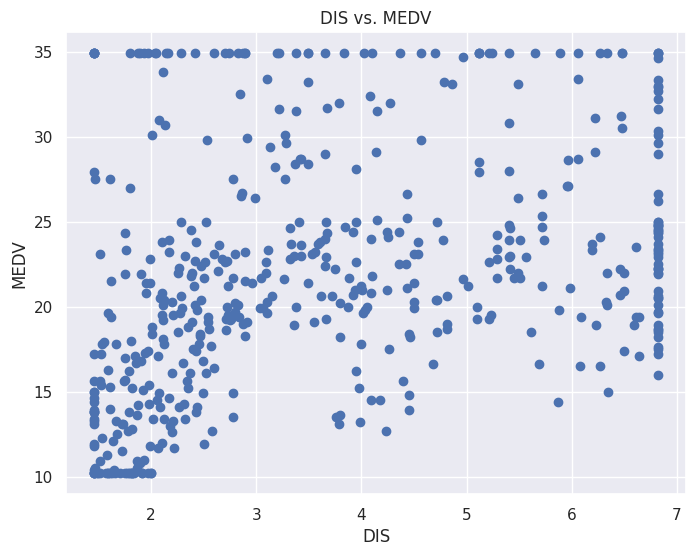

In [19]:
# Scatter plot of DIS vs. MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['DIS'], df['MEDV'])
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('DIS vs. MEDV')
plt.show()

Feature Scaling:

In [20]:
#Data normalization
from sklearn.preprocessing import StandardScaler

#Select the numerical features
num_feat=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

#Standardize the features
scaler=StandardScaler()
df[num_feat]=scaler.fit_transform(df[num_feat])

**Model Building**

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [22]:
#Split the data into training and testing set
x_train, x_test, y_train, y_test=train_test_split(df[num_feat], df['MEDV'], test_size=0.2, random_state=42)

In [23]:
#Create the xgboost model
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

In [24]:
# Train the model
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
# Make predictions on the testing data
y_pred = xgb_model.predict(x_test)

**Model Evaluation**

In [26]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  5.508529262454641
Mean Absolute Error (MAE):  1.7952852006052051
R-squared (R2):  0.8703518691201494


**Interpretation and Significance:**
The model's performance metrics provide valuable insights into its predictive accuracy and ability to capture housing price trends:

Mean Squared Error (MSE): With an MSE of 5.51, the model's prediction errors are relatively low, indicating a close fit to the actual housing prices in the dataset.

Mean Absolute Error (MAE): The MAE of 1.80 highlights the average absolute difference between the predicted and actual prices. Lower values signify better accuracy.

R-squared (R2): An R2 value of 0.87 signifies that approximately 87% of the variability in housing prices can be explained by the model. This indicates a strong fit to the data and reliable price predictions.

**Conclusion:**
In conclusion,  this XGBoost regression model has successfully learned the underlying patterns in the Boston Housing Dataset, allowing it to make accurate predictions of housing prices. The model's low MSE and MAE values showcase its precision, while the high R2 value suggests its effectiveness in explaining housing price variations. Therefore, the achieved results underscore the model's accuracy and its potential to enhance real estate insights and strategic planning.